## WordCloud
- conda activate base
- pip install wordcloud

In [1]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

- Stop words 비교

In [2]:
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
# WordCloud에서 제공하는 불용어
sw_wc = STOPWORDS
print(sw_wc)

{"wouldn't", "won't", "aren't", 'had', 'yours', 'some', 'or', 'ever', 'hers', 'http', 'else', 'at', 'does', "hasn't", 'with', 'be', 'only', 'most', 'these', 'which', 'you', 'however', 'while', 'out', 'itself', 'like', 'am', 'between', 'get', 'has', 'shall', 'but', 'his', 'were', "shan't", 'we', 'yourselves', 'its', 'their', 'who', 'nor', 'both', 'just', 'after', "when's", 'he', 'so', 'before', 'further', "i'd", 'own', 'until', 'how', "we're", "i've", "you're", 'any', 'those', 'during', "mustn't", 'once', 'himself', 'them', 'a', "wasn't", 'up', 'on', "he'll", "they'll", 'through', "she'll", 'i', 'can', "who's", "she'd", "they'd", 'was', "he's", 'from', 'of', 'doing', 'here', 'ought', "she's", "can't", 'k', 'otherwise', 'not', 'same', 'also', 'been', "doesn't", 'themselves', 'if', 'an', 'again', 'such', 'myself', 'our', 'they', 'cannot', 'this', "weren't", 'the', 'r', 'in', "that's", 'to', 'why', "isn't", 'what', 'me', "they've", 'that', 'and', 'therefore', "why's", 'ourselves', 'because

In [4]:
len(sw_nltk), len(sw_wc)

(179, 192)

##### 1. Alice in Wonderland

In [5]:
with open('data/Alice.txt') as file:
    text = file.read()

In [6]:
wc = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=sw_wc
    ).generate(text)

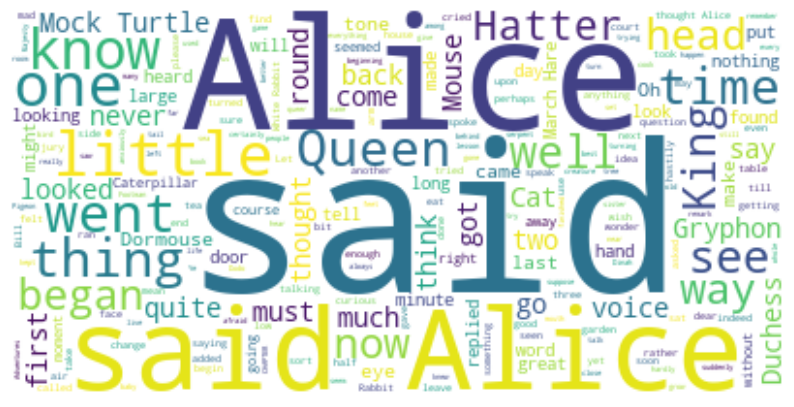

In [7]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
# 사용빈도 Top 10
count = 0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

said:	1.0
Alice:	0.7225433526011561
said Alice:	0.3352601156069364
little:	0.31213872832369943
one:	0.29190751445086704
know:	0.26011560693641617
went:	0.2398843930635838
thing:	0.23121387283236994
time:	0.22254335260115607
Queen:	0.21965317919075145


In [9]:
# stopwords에 said 추가
sw_wc.add('said')
wc = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=sw_wc
    ).generate(text)

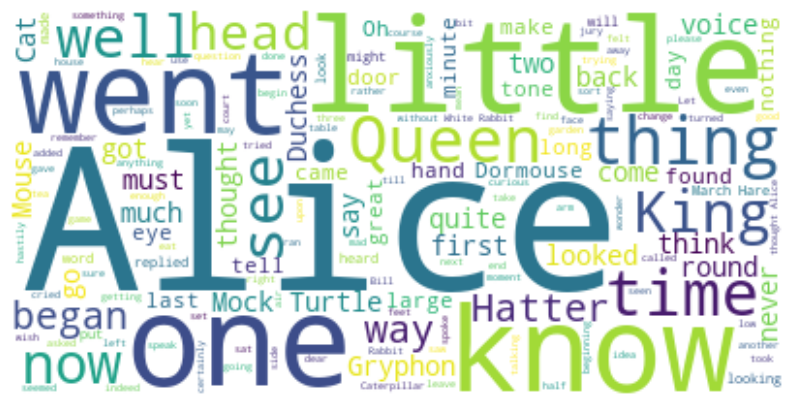

In [10]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
count = 0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

Alice:	1.0
little:	0.29508196721311475
one:	0.27595628415300544
know:	0.2459016393442623
went:	0.226775956284153
thing:	0.2185792349726776
time:	0.2103825136612022
Queen:	0.20765027322404372
see:	0.1830601092896175
King:	0.17486338797814208


- 배경 그림위에 표시하기

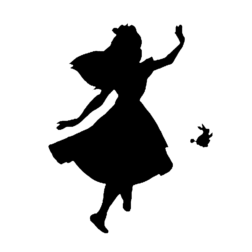

In [12]:
mask = np.array(Image.open('data/Alice_mask.png'))
plt.figure(figsize=(3, 5))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off');

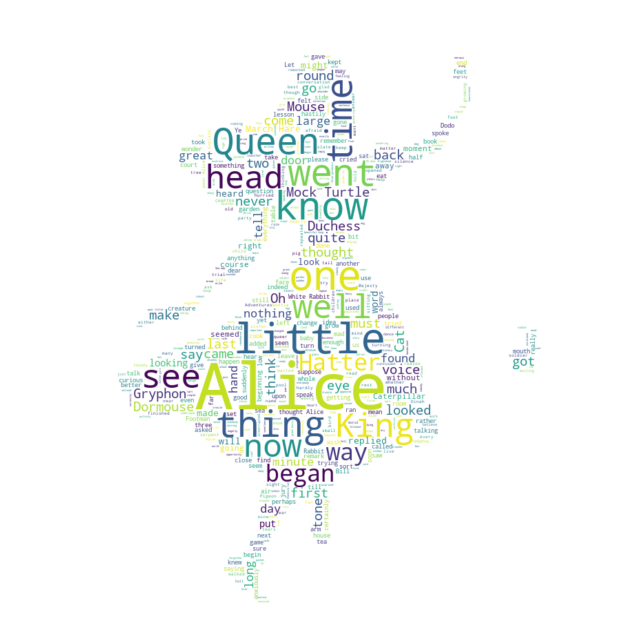

In [13]:
wc = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=sw_wc,
        mask=mask
    ).generate(text)

plt.figure(figsize=(8,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

##### 2. Star Wars

In [14]:
with open('data/A_new_hope.txt') as file:
    text = file.read()

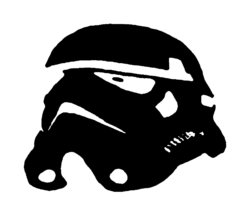

In [15]:
mask = np.array(Image.open('data/Stormtrooper_mask.png'))
plt.figure(figsize=(3, 3))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off');

In [16]:
wc = WordCloud(
        mask=mask, max_words=1000, stopwords=sw_wc,
        margin=10, random_state=2023
    ).generate(text)
default_color = wc.to_array

In [17]:
# HSL: Hue(색상), Saturation(채도), Lightness(명도)
def grey_color(word, font_size, position, orientation, random_state, **kwargs):
    return f'hsl(0, 0%, {np.random.randint(60, 101)}%)'

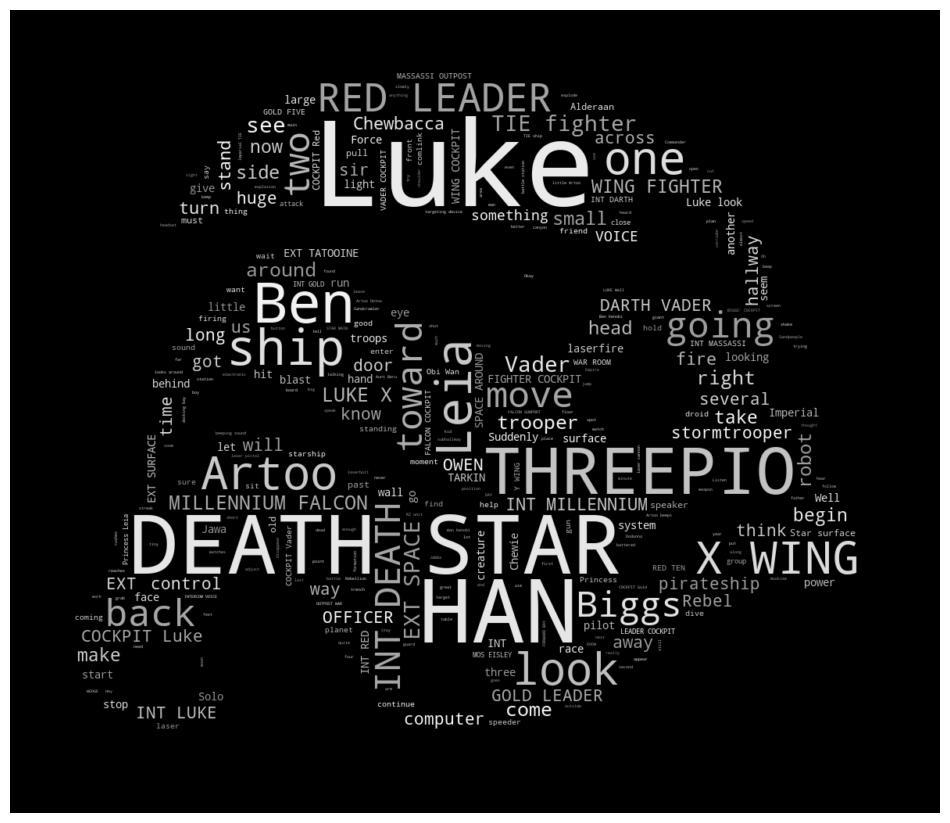

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2023), interpolation='bilinear')
plt.axis('off');

In [19]:
count = 0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

Luke:	1.0
HAN:	0.49053030303030304
DEATH STAR:	0.42424242424242425
THREEPIO:	0.3977272727272727
Ben:	0.2897727272727273
Leia:	0.21401515151515152
ship:	0.21401515151515152
Artoo:	0.1875
one:	0.18181818181818182
X WING:	0.17992424242424243


- 개선

In [20]:
# 이름 - 하나로 통일
text = text.replace('HAN', 'Han').replace('LUKE', 'Luke')

In [21]:
# 불용어에 int, ext 제거
sw = STOPWORDS
sw.add('INT'); sw.add('int'); sw.add('EXT'); sw.add('ext')

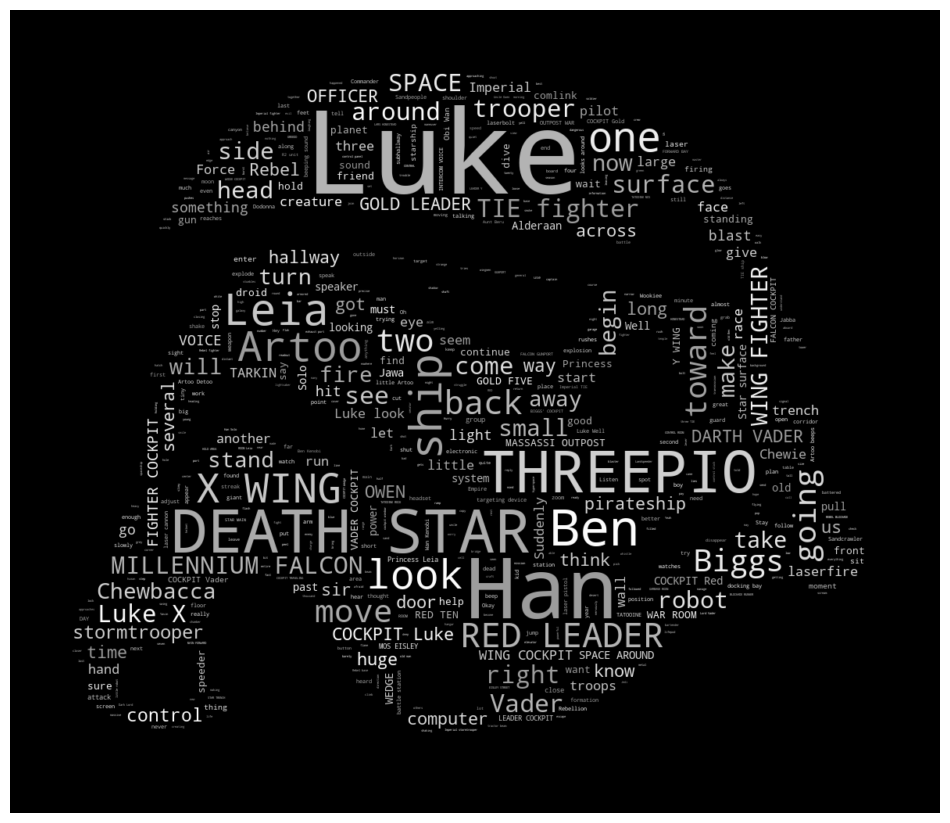

In [22]:
wc = WordCloud(
        mask=mask, max_words=1000, stopwords=sw,
        margin=10, random_state=2023
    ).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2023), interpolation='bilinear')
plt.axis('off');